In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import tensorflow as tf
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("wesad-classification-hrv-train-dataset.csv")
data

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject id,condition,SSSQ class,SSSQ Label,condition label
0,860.758450,858.389130,75.161448,14.461513,14.460581,5.197343,70.242263,6.25,0.75,10.238012,...,-5.208054e+06,0.137408,0.091228,3.666502,0.009514,7,baseline,low,0,0
1,1044.449374,1036.796500,82.209648,22.516679,22.515843,3.651056,57.792396,28.50,2.25,15.941094,...,4.953282e+06,0.059868,0.030044,25.537614,0.001175,4,baseline,low,0,0
2,510.072193,503.341590,32.094249,8.549018,8.547740,3.754145,118.059988,3.50,0.00,6.051753,...,-1.685542e+06,0.127065,0.333489,3.031509,0.084238,13,stress,medium,1,2
3,930.296969,940.394165,59.089578,7.816167,7.814190,7.559917,64.769049,0.00,0.00,5.532404,...,5.520502e+06,0.505268,0.392480,11.410422,0.004625,5,baseline,high,2,0
4,692.067906,687.546285,47.584437,6.487698,6.487256,7.334564,87.096547,0.00,0.00,4.592942,...,6.091203e+06,0.248241,0.322039,19.549568,0.003409,5,stress,high,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108515,749.434911,744.009250,64.790097,10.188321,10.184029,6.359252,80.640911,3.25,0.00,7.210237,...,-1.795373e+06,0.176761,0.156051,3.711716,0.010302,15,baseline,medium,1,0
108516,699.731792,694.278245,52.669920,13.735290,13.732733,3.834642,86.216287,7.75,0.25,9.722700,...,-2.751756e+06,0.124832,0.145737,0.705795,0.166195,15,stress,medium,1,2
108517,524.960265,517.460805,30.945793,7.222979,7.221443,4.284353,114.670177,0.50,0.00,5.112742,...,3.118196e+06,0.098574,0.260064,4.994050,0.137364,14,stress,high,2,2
108518,708.073163,702.006530,47.784108,7.904278,7.897932,6.045347,85.099063,1.75,0.00,5.591693,...,1.583340e+06,0.211085,0.266733,5.968401,0.028522,13,baseline,medium,1,0


## EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108520 entries, 0 to 108519
Data columns (total 67 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   MEAN_RR                   108520 non-null  float64
 1   MEDIAN_RR                 108520 non-null  float64
 2   SDRR                      108520 non-null  float64
 3   RMSSD                     108520 non-null  float64
 4   SDSD                      108520 non-null  float64
 5   SDRR_RMSSD                108520 non-null  float64
 6   HR                        108520 non-null  float64
 7   pNN25                     108520 non-null  float64
 8   pNN50                     108520 non-null  float64
 9   SD1                       108520 non-null  float64
 10  SD2                       108520 non-null  float64
 11  KURT                      108520 non-null  float64
 12  SKEW                      108520 non-null  float64
 13  MEAN_REL_RR               108520 non-null  f

In [ ]:
data.isna().sum()

MEAN_RR            0
MEDIAN_RR          0
SDRR               0
RMSSD              0
SDSD               0
                  ..
subject id         0
condition          0
SSSQ class         0
SSSQ Label         0
condition label    0
Length: 67, dtype: int64

Text(0.5, 1.0, 'Total Missing Values')

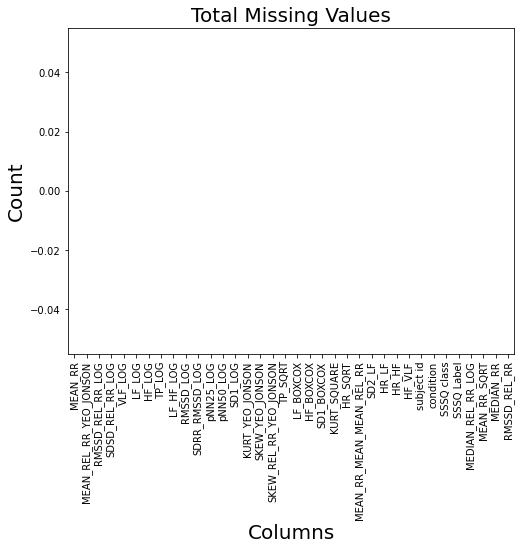

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
total_select = total.head(36)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [ ]:
data['condition'].value_counts()

baseline     57198
stress       32813
amusement    18509
Name: condition, dtype: int64

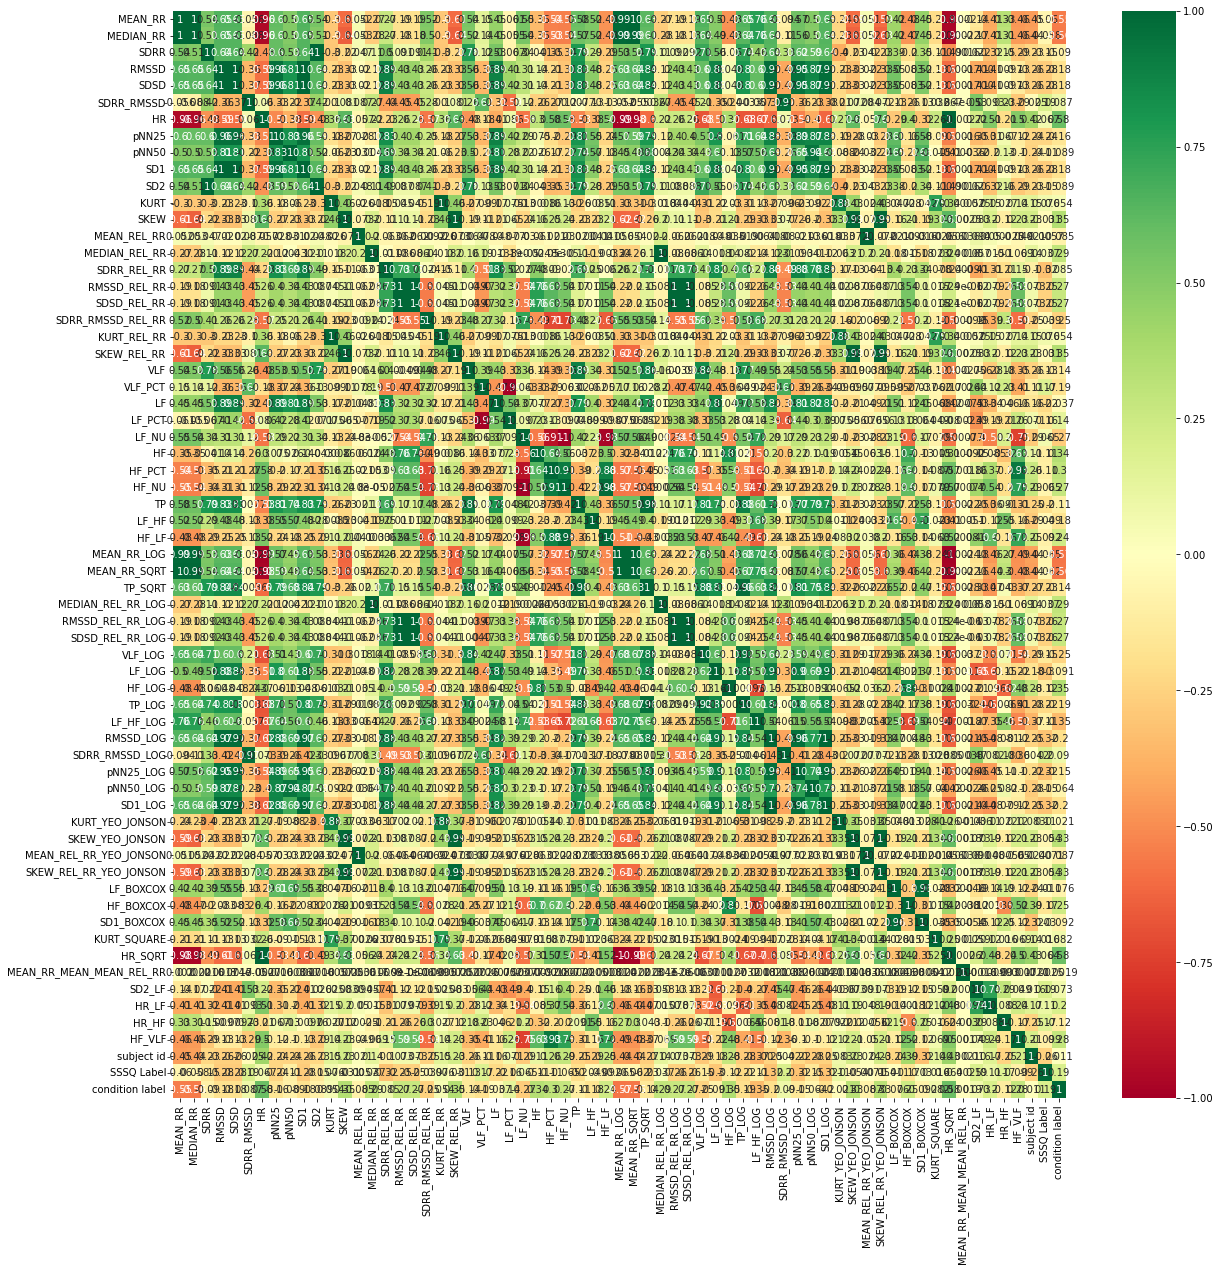

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [ ]:
features = data.corr()['condition label'].sort_values(ascending=False)
features[:60]

condition label             1.000000
HR_SQRT                     0.582502
HR                          0.582337
HF_LOG                      0.353672
SKEW_REL_RR                 0.349135
SKEW                        0.349135
HF                          0.340441
SKEW_YEO_JONSON             0.326212
SKEW_REL_RR_YEO_JONSON      0.326212
HF_PCT                      0.298771
MEDIAN_REL_RR_LOG           0.289862
MEDIAN_REL_RR               0.289777
HF_VLF                      0.283049
HF_NU                       0.274464
SDSD_REL_RR_LOG             0.269190
RMSSD_REL_RR_LOG            0.269188
SDSD_REL_RR                 0.269026
RMSSD_REL_RR                0.269024
HF_BOXCOX                   0.245196
HF_LF                       0.240619
HR_LF                       0.199023
SSSQ Label                  0.190334
LF_PCT                      0.140448
SDRR_RMSSD_LOG              0.089643
SDRR_RMSSD                  0.086910
SDRR_REL_RR                 0.085288
KURT_SQUARE                 0.082063
S

## Visualising outliers

<AxesSubplot:>

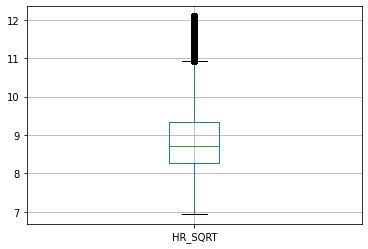

In [ ]:
data.boxplot(column='HR_SQRT')

<AxesSubplot:>

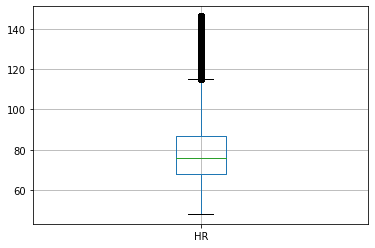

In [ ]:
data.boxplot(column='HR')

<AxesSubplot:>

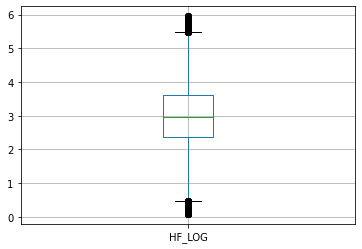

In [ ]:
data.boxplot(column='HF_LOG')

<AxesSubplot:>

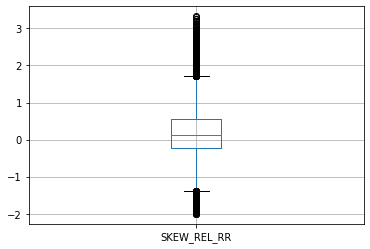

In [ ]:
data.boxplot(column='SKEW_REL_RR')

<AxesSubplot:>

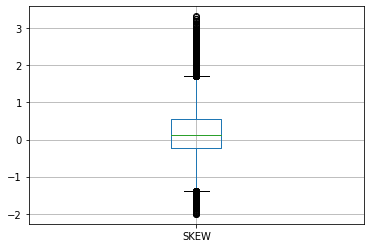

In [ ]:
data.boxplot(column='SKEW')

<AxesSubplot:>

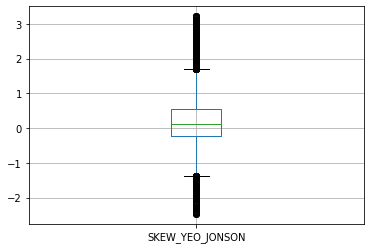

In [ ]:
data.boxplot(column='SKEW_YEO_JONSON')

<AxesSubplot:>

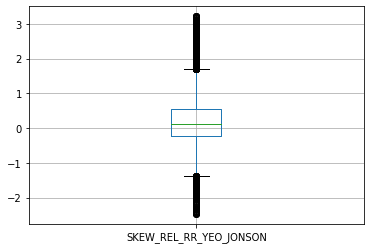

In [ ]:
data.boxplot(column='SKEW_REL_RR_YEO_JONSON')

<AxesSubplot:>

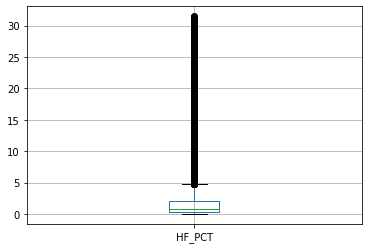

In [ ]:
data.boxplot(column='HF_PCT')

<AxesSubplot:>

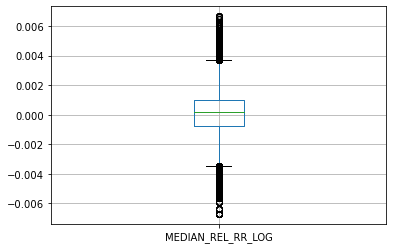

In [ ]:
data.boxplot(column='MEDIAN_REL_RR_LOG')

<AxesSubplot:>

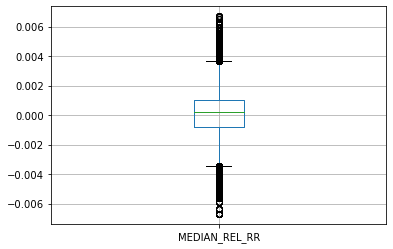

In [ ]:
data.boxplot(column='MEDIAN_REL_RR')

<AxesSubplot:>

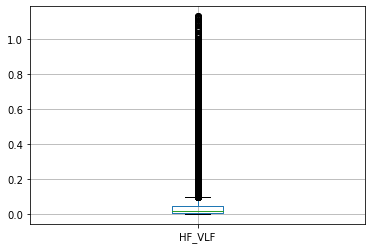

In [ ]:
data.boxplot(column='HF_VLF')

<AxesSubplot:>

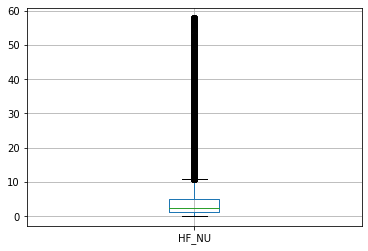

In [ ]:
data.boxplot(column='HF_NU')

<AxesSubplot:>

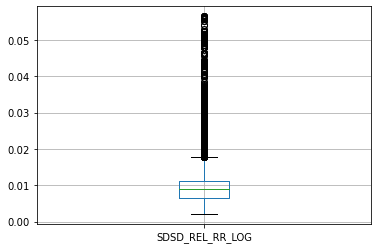

In [ ]:
data.boxplot(column='SDSD_REL_RR_LOG')

<AxesSubplot:>

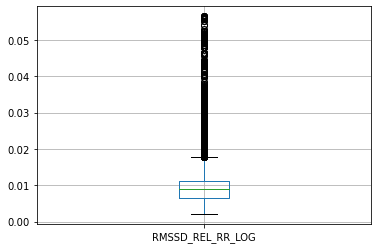

In [ ]:
data.boxplot(column='RMSSD_REL_RR_LOG')

<AxesSubplot:>

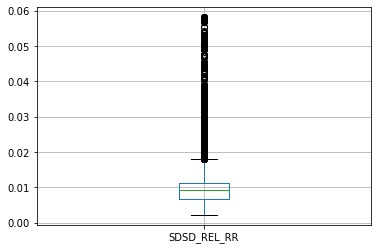

In [ ]:
data.boxplot(column='SDSD_REL_RR')

<AxesSubplot:>

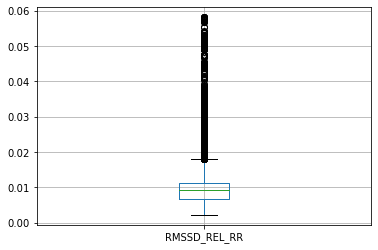

In [ ]:
data.boxplot(column='RMSSD_REL_RR')

<AxesSubplot:>

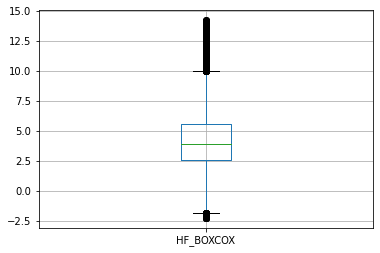

In [ ]:
data.boxplot(column='HF_BOXCOX')

<AxesSubplot:>

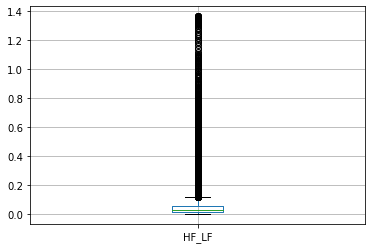

In [ ]:
data.boxplot(column='HF_LF')

<AxesSubplot:>

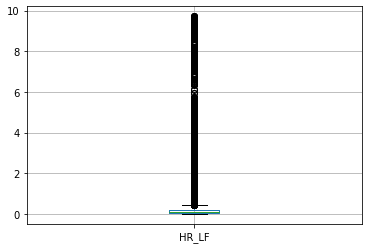

In [ ]:
data.boxplot(column='HR_LF')

<AxesSubplot:>

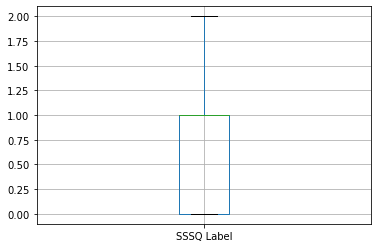

In [ ]:
data.boxplot(column='SSSQ Label')

<AxesSubplot:>

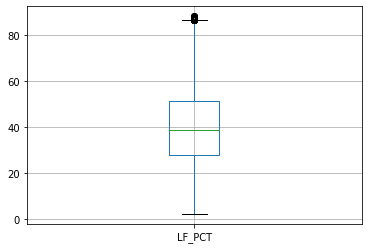

In [ ]:
data.boxplot(column='LF_PCT')

<AxesSubplot:>

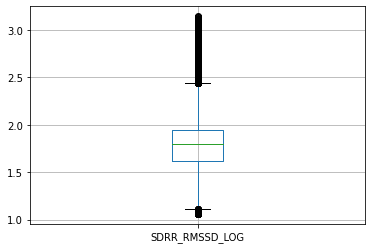

In [ ]:
data.boxplot(column='SDRR_RMSSD_LOG')

<AxesSubplot:>

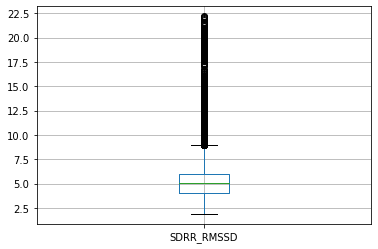

In [ ]:
data.boxplot(column='SDRR_RMSSD')

<AxesSubplot:>

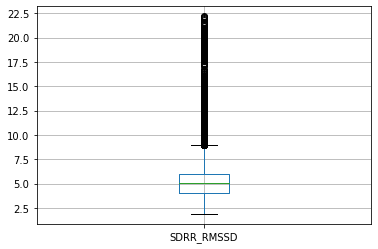

In [ ]:
data.boxplot(column='SDRR_RMSSD')

<AxesSubplot:>

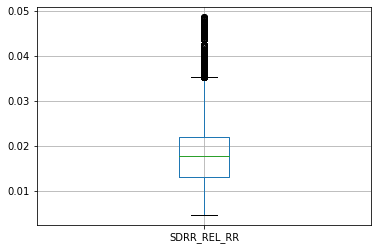

In [ ]:
data.boxplot(column='SDRR_REL_RR')

<AxesSubplot:>

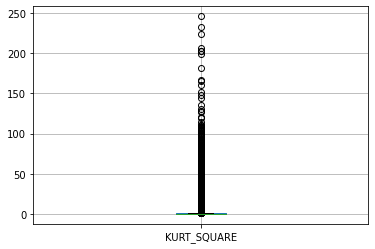

In [ ]:
data.boxplot(column='KURT_SQUARE')

<AxesSubplot:>

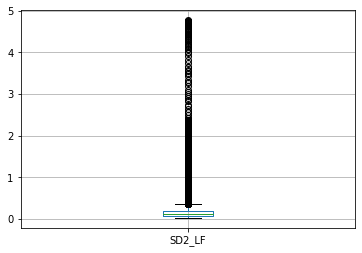

In [ ]:
data.boxplot(column='SD2_LF')

<AxesSubplot:>

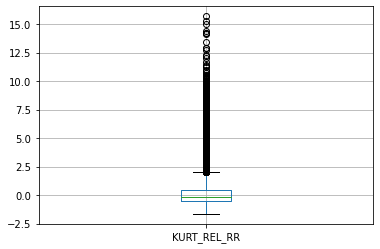

In [ ]:
data.boxplot(column='KURT_REL_RR')

<AxesSubplot:>

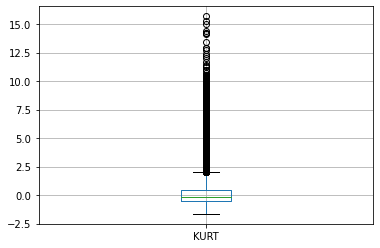

In [ ]:
data.boxplot(column='KURT')

## Resolving Outliers

Text(0, 0.5, 'condition label')

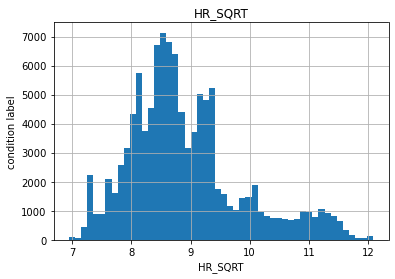

In [ ]:
figure_1=data.HR_SQRT.hist(bins=50)
figure_1.set_title('HR_SQRT')
figure_1.set_xlabel('HR_SQRT')
figure_1.set_ylabel('condition label')

In [ ]:
data['HR_SQRT'].describe()

count    108520.000000
mean          8.905015
std           0.958695
min           6.941605
25%           8.259132
50%           8.716314
75%           9.326945
max          12.090949
Name: HR_SQRT, dtype: float64

In [ ]:
data['HR_SQRT'].mean()

8.905014852975244

In [ ]:
data['HR_SQRT'].max()

12.09094883691127

In [ ]:
##### Assuming step follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

upper_boundary_1=data['HR_SQRT'].mean() + 3* data['HR_SQRT'].std()
lower_boundary_1=data['HR_SQRT'].mean() - 3* data['HR_SQRT'].std()
print(lower_boundary_1), print(upper_boundary_1),print(data['HR_SQRT'].mean())

6.028928814218581
11.781100891731906
8.905014852975244


(None, None, None)

Text(0, 0.5, 'condition label')

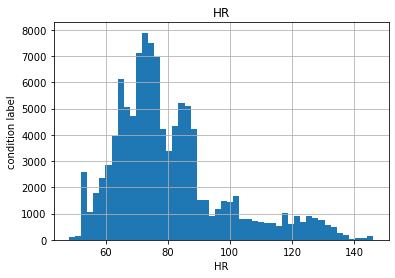

In [ ]:
figure_1=data.HR.hist(bins=50)
figure_1.set_title('HR')
figure_1.set_xlabel('HR')
figure_1.set_ylabel('condition label')

In [ ]:
data['HR'].describe()

count    108520.000000
mean         80.218378
std          17.938049
min          48.185880
25%          68.213261
50%          75.974129
75%          86.991905
max         146.191044
Name: HR, dtype: float64

In [ ]:
data['HR'].mean()

80.21837782925746

In [ ]:
data['HR'].max()

146.191043776806

In [ ]:
##### Assuming step follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

upper_boundary_2=data['HR'].mean() + 3* data['HR'].std()
lower_boundary_2=data['HR'].mean() - 3* data['HR'].std()
print(lower_boundary_2), print(upper_boundary_2),print(data['HR'].mean())

26.404231744891433
134.0325239136235
80.21837782925746


(None, None, None)

In [ ]:
iqr_2 = data.HR.quantile(0.75)-data.HR.quantile(0.25)
iqr_2

18.77864378057012

In [ ]:
data

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject id,condition,SSSQ class,SSSQ Label,condition label
0,860.758450,858.389130,75.161448,14.461513,14.460581,5.197343,70.242263,6.25,0.75,10.238012,...,-5.208054e+06,0.137408,0.091228,3.666502,0.009514,7,baseline,low,0,0
1,1044.449374,1036.796500,82.209648,22.516679,22.515843,3.651056,57.792396,28.50,2.25,15.941094,...,4.953282e+06,0.059868,0.030044,25.537614,0.001175,4,baseline,low,0,0
2,510.072193,503.341590,32.094249,8.549018,8.547740,3.754145,118.059988,3.50,0.00,6.051753,...,-1.685542e+06,0.127065,0.333489,3.031509,0.084238,13,stress,medium,1,2
3,930.296969,940.394165,59.089578,7.816167,7.814190,7.559917,64.769049,0.00,0.00,5.532404,...,5.520502e+06,0.505268,0.392480,11.410422,0.004625,5,baseline,high,2,0
4,692.067906,687.546285,47.584437,6.487698,6.487256,7.334564,87.096547,0.00,0.00,4.592942,...,6.091203e+06,0.248241,0.322039,19.549568,0.003409,5,stress,high,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108515,749.434911,744.009250,64.790097,10.188321,10.184029,6.359252,80.640911,3.25,0.00,7.210237,...,-1.795373e+06,0.176761,0.156051,3.711716,0.010302,15,baseline,medium,1,0
108516,699.731792,694.278245,52.669920,13.735290,13.732733,3.834642,86.216287,7.75,0.25,9.722700,...,-2.751756e+06,0.124832,0.145737,0.705795,0.166195,15,stress,medium,1,2
108517,524.960265,517.460805,30.945793,7.222979,7.221443,4.284353,114.670177,0.50,0.00,5.112742,...,3.118196e+06,0.098574,0.260064,4.994050,0.137364,14,stress,high,2,2
108518,708.073163,702.006530,47.784108,7.904278,7.897932,6.045347,85.099063,1.75,0.00,5.591693,...,1.583340e+06,0.211085,0.266733,5.968401,0.028522,13,baseline,medium,1,0


In [ ]:
df = data.copy()

In [ ]:
df.loc[df['HR_SQRT']>=11.781,'HR_SQRT']=11.781


In [ ]:
df.loc[df['HR']>=125,'HR']=125

Text(0, 0.5, 'condition label')

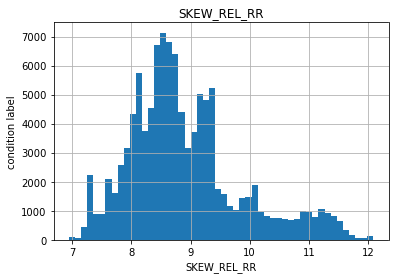

In [ ]:
figure_1=data.HR_SQRT.hist(bins=50)
figure_1.set_title('SKEW_REL_RR')
figure_1.set_xlabel('SKEW_REL_RR')
figure_1.set_ylabel('condition label')

In [ ]:
data['SKEW_REL_RR'].describe()

count    108520.000000
mean          0.183792
std           0.606903
min          -2.005348
25%          -0.224993
50%           0.133696
75%           0.550765
max           3.324782
Name: SKEW_REL_RR, dtype: float64

In [ ]:
data['SKEW_REL_RR'].max()

3.324781857030374

In [ ]:
data['SKEW_REL_RR'].mean()

0.1837918073812578

In [ ]:
upper_boundary_2=data['SKEW_REL_RR'].mean() + 3* data['SKEW_REL_RR'].std()
lower_boundary_2=data['SKEW_REL_RR'].mean() - 3* data['SKEW_REL_RR'].std()
print(lower_boundary_2), print(upper_boundary_2),print(data['SKEW_REL_RR'].mean())

-1.636916933429647
2.0045005481921625
0.1837918073812578


(None, None, None)

In [ ]:
df.loc[df['SKEW_REL_RR']>=2.5,'SKEW_REL_RR']=2.5
df.loc[df['SKEW_REL_RR']<=-1.6,'SKEW_REL_RR']=-1.6

In [ ]:
df.loc[df['LF_PCT']>=80,'SKEW_REL_RR']=80

In [ ]:
df

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject id,condition,SSSQ class,SSSQ Label,condition label
0,860.758450,858.389130,75.161448,14.461513,14.460581,5.197343,70.242263,6.25,0.75,10.238012,...,-5.208054e+06,0.137408,0.091228,3.666502,0.009514,7,baseline,low,0,0
1,1044.449374,1036.796500,82.209648,22.516679,22.515843,3.651056,57.792396,28.50,2.25,15.941094,...,4.953282e+06,0.059868,0.030044,25.537614,0.001175,4,baseline,low,0,0
2,510.072193,503.341590,32.094249,8.549018,8.547740,3.754145,118.059988,3.50,0.00,6.051753,...,-1.685542e+06,0.127065,0.333489,3.031509,0.084238,13,stress,medium,1,2
3,930.296969,940.394165,59.089578,7.816167,7.814190,7.559917,64.769049,0.00,0.00,5.532404,...,5.520502e+06,0.505268,0.392480,11.410422,0.004625,5,baseline,high,2,0
4,692.067906,687.546285,47.584437,6.487698,6.487256,7.334564,87.096547,0.00,0.00,4.592942,...,6.091203e+06,0.248241,0.322039,19.549568,0.003409,5,stress,high,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108515,749.434911,744.009250,64.790097,10.188321,10.184029,6.359252,80.640911,3.25,0.00,7.210237,...,-1.795373e+06,0.176761,0.156051,3.711716,0.010302,15,baseline,medium,1,0
108516,699.731792,694.278245,52.669920,13.735290,13.732733,3.834642,86.216287,7.75,0.25,9.722700,...,-2.751756e+06,0.124832,0.145737,0.705795,0.166195,15,stress,medium,1,2
108517,524.960265,517.460805,30.945793,7.222979,7.221443,4.284353,114.670177,0.50,0.00,5.112742,...,3.118196e+06,0.098574,0.260064,4.994050,0.137364,14,stress,high,2,2
108518,708.073163,702.006530,47.784108,7.904278,7.897932,6.045347,85.099063,1.75,0.00,5.591693,...,1.583340e+06,0.211085,0.266733,5.968401,0.028522,13,baseline,medium,1,0


In [ ]:
X = df[['HR_SQRT', 'HR', 'HF_LOG', 'SKEW_REL_RR', 'SKEW', 'HF', 'SKEW_YEO_JONSON', 'SKEW_REL_RR_YEO_JONSON', 'HF_PCT', 'MEDIAN_REL_RR_LOG', 'MEDIAN_REL_RR', 'HF_VLF', 'HF_NU', 'SDSD_REL_RR_LOG', 'RMSSD_REL_RR_LOG', 'SDSD_REL_RR', 'RMSSD_REL_RR', 'HF_BOXCOX', 'HF_LF', 'HR_LF', 'SSSQ Label', 'LF_PCT', 'SDRR_RMSSD_LOG', 'SDRR_RMSSD', 'SDRR_REL_RR', 'KURT_SQUARE', 'SD2_LF', 'KURT_REL_RR', 'KURT']]
Y = df[['condition label']]

## Splitting training data set

In [ ]:
X_train = X[-108520:]
y_train = Y[-108520:]

In [ ]:
data2 = pd.read_csv("wesad-classification-hrv-test-dataset.csv")
data2

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject id,condition,SSSQ class,SSSQ Label,condition label
0,856.640559,855.196440,63.543133,15.490732,15.490690,4.102010,70.436793,9.75,0.0,10.967324,...,-1.241198e+07,0.083708,0.066106,2.156205,0.031908,8,baseline,medium,1,0
1,911.890969,914.313935,49.739529,11.485676,11.485584,4.330570,65.996032,3.50,0.0,8.131731,...,3.087452e+07,0.142285,0.134394,9.215434,0.005218,6,baseline,medium,1,0
2,505.424097,500.162060,27.207534,5.217502,5.216857,5.214666,119.049905,0.00,0.0,3.693507,...,-4.138619e+06,0.180380,0.560690,8.795038,0.072400,11,stress,high,2,2
3,976.606489,976.392520,93.145519,24.999690,24.999508,3.725867,62.014311,32.25,4.0,17.699516,...,-8.913369e+06,0.058028,0.027568,9.998307,0.002822,17,baseline,low,0,0
4,740.323476,729.095405,73.676039,10.740166,10.739891,6.859860,81.833707,3.75,0.0,7.603784,...,-5.150339e+06,0.193675,0.152519,5.783011,0.004499,15,baseline,medium,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13560,823.312502,822.335095,52.926006,15.580839,15.579649,3.396865,73.177890,8.50,0.0,11.030307,...,-3.656790e+06,0.058746,0.058068,3.095154,0.029057,11,baseline,low,0,0
13561,813.487251,812.393075,36.414421,11.722249,11.719850,3.106436,73.905611,3.50,0.0,8.297590,...,2.498761e+06,0.134053,0.194929,1.471170,0.171440,14,baseline,high,2,0
13562,1038.999403,1031.351750,90.367195,26.508801,26.507248,3.408951,58.174854,34.75,5.5,18.766987,...,-2.669341e+06,0.051203,0.023563,13.195805,0.001831,4,baseline,low,0,0
13563,716.291740,714.843350,41.201263,5.528628,5.522179,7.452348,84.037013,0.00,0.0,3.909673,...,-1.867412e+06,0.549884,0.794870,12.422019,0.011508,5,stress,high,2,2


In [ ]:
df2 = data2.copy()

In [ ]:
df2.loc[df2['HR_SQRT']>=11.781,'HR_SQRT']=11.781


In [ ]:
df2.loc[df2['HR']>=125,'HR']=125

In [ ]:
df2.loc[df2['SKEW_REL_RR']>=2.5,'SKEW_REL_RR']=2.5
df2.loc[df2['SKEW_REL_RR']<=-1.6,'SKEW_REL_RR']=-1.6

In [ ]:
df2.loc[df2['LF_PCT']>=80,'SKEW_REL_RR']=80

In [ ]:
df2

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject id,condition,SSSQ class,SSSQ Label,condition label
0,856.640559,855.196440,63.543133,15.490732,15.490690,4.102010,70.436793,9.75,0.0,10.967324,...,-1.241198e+07,0.083708,0.066106,2.156205,0.031908,8,baseline,medium,1,0
1,911.890969,914.313935,49.739529,11.485676,11.485584,4.330570,65.996032,3.50,0.0,8.131731,...,3.087452e+07,0.142285,0.134394,9.215434,0.005218,6,baseline,medium,1,0
2,505.424097,500.162060,27.207534,5.217502,5.216857,5.214666,119.049905,0.00,0.0,3.693507,...,-4.138619e+06,0.180380,0.560690,8.795038,0.072400,11,stress,high,2,2
3,976.606489,976.392520,93.145519,24.999690,24.999508,3.725867,62.014311,32.25,4.0,17.699516,...,-8.913369e+06,0.058028,0.027568,9.998307,0.002822,17,baseline,low,0,0
4,740.323476,729.095405,73.676039,10.740166,10.739891,6.859860,81.833707,3.75,0.0,7.603784,...,-5.150339e+06,0.193675,0.152519,5.783011,0.004499,15,baseline,medium,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13560,823.312502,822.335095,52.926006,15.580839,15.579649,3.396865,73.177890,8.50,0.0,11.030307,...,-3.656790e+06,0.058746,0.058068,3.095154,0.029057,11,baseline,low,0,0
13561,813.487251,812.393075,36.414421,11.722249,11.719850,3.106436,73.905611,3.50,0.0,8.297590,...,2.498761e+06,0.134053,0.194929,1.471170,0.171440,14,baseline,high,2,0
13562,1038.999403,1031.351750,90.367195,26.508801,26.507248,3.408951,58.174854,34.75,5.5,18.766987,...,-2.669341e+06,0.051203,0.023563,13.195805,0.001831,4,baseline,low,0,0
13563,716.291740,714.843350,41.201263,5.528628,5.522179,7.452348,84.037013,0.00,0.0,3.909673,...,-1.867412e+06,0.549884,0.794870,12.422019,0.011508,5,stress,high,2,2


In [ ]:
X2 = df2[['HR_SQRT', 'HR', 'HF_LOG', 'SKEW_REL_RR', 'SKEW', 'HF', 'SKEW_YEO_JONSON', 'SKEW_REL_RR_YEO_JONSON', 'HF_PCT', 'MEDIAN_REL_RR_LOG', 'MEDIAN_REL_RR', 'HF_VLF', 'HF_NU', 'SDSD_REL_RR_LOG', 'RMSSD_REL_RR_LOG', 'SDSD_REL_RR', 'RMSSD_REL_RR', 'HF_BOXCOX', 'HF_LF', 'HR_LF', 'SSSQ Label', 'LF_PCT', 'SDRR_RMSSD_LOG', 'SDRR_RMSSD', 'SDRR_REL_RR', 'KURT_SQUARE', 'SD2_LF', 'KURT_REL_RR', 'KURT']]
Y2 = df2[['condition label']]

## Splitting test dataset

In [ ]:
X_test = X2[-13565:]
y_test = Y2[-13565:]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.54688622, -0.56333426,  0.05517789, ..., -0.14143334,
        -0.90403891, -0.90403891],
       [-1.36067606, -1.2821436 , -1.76848543, ..., -0.51781188,
         0.29890666,  0.29890666],
       [ 2.04876254,  2.19748456,  0.74009431, ..., -0.19164042,
         4.60218787,  4.60218787],
       ...,
       [ 1.88460653,  2.00176943,  0.22828578, ..., -0.32993553,
         0.54116737,  0.54116737],
       [ 0.33472326,  0.29444252, -0.22371081, ...,  0.21619229,
         2.00102138,  2.00102138],
       [-0.32040992, -0.35082869,  0.33133355, ..., -0.34995277,
        -0.08385129, -0.08385129]])

## Applying PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
X_train

array([[-1.41042743, -0.833963  , -0.47307459, -0.28126867],
       [-1.25202724, -1.16649852,  2.3737371 ,  0.82850705],
       [ 5.22605117,  5.91896242,  5.8692397 ,  2.33220867],
       ...,
       [ 2.33803671,  2.10294069,  1.48465234,  0.01681443],
       [-0.46835493,  4.28410265,  2.41218231, -0.02276352],
       [-0.2004151 , -0.19523599,  0.98045401, -0.53666667]])

## Creating XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

## Predicting test set result

In [ ]:
y_pred = classifier.predict(X_test)
y_pred[:40]

array([0, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 2, 0, 1,
       2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1], dtype=int64)

## Creating Confusion Matrix, Precison, Recall, Accuracy and F1_Score

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
Precision = precision_score(y_test, y_pred,average='weighted')
Recall = recall_score(y_test, y_pred, average='weighted')
print(Precision)
print(Recall)

[[6874  139  216]
 [ 215 1995  103]
 [ 204   69 3750]]
0.9300329822689466
0.9302617029119057


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score
Accuracy = accuracy_score(y_test, y_pred)
print(Accuracy)
F1_score = f1_score(y_test, y_pred, average='weighted')
print(F1_score)

0.9302617029119057
0.9300392250738599


# Applying K-Fold Cross Validation 

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 93.12 %
Standard Deviation: 0.37 %
